In [ ]:
# FastAPI Server - Return String from Request

This notebook demonstrates how to create a FastAPI server that can return strings from various types of requests:
- Query parameters
- Path parameters  
- Request body (JSON)
- Form data


In [ ]:
# Install required packages (run this in terminal if not installed)
# !pip install fastapi uvicorn

In [ ]:
from fastapi import FastAPI, Query, Body, Form
from fastapi.responses import JSONResponse
from typing import Optional
import uvicorn

# Create FastAPI app instance
app = FastAPI(title="String Return Server", version="1.0.0")

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

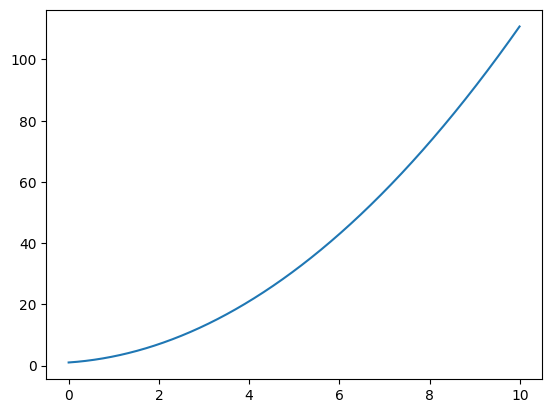

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x ** 2 + x + 1
x = np.arange(10, step=0.01)
print(x)
y = f(x)
plt.plot(x, y)
plt.show()


In [ ]:
# Example 1: Return string from query parameter
@app.get("/echo")
async def echo_query(text: str = Query(..., description="The string to return")):
    """
    Returns the string passed as a query parameter.
    Usage: GET /echo?text=Hello%20World
    """
    return {"message": text, "received": text}

In [ ]:
# Example 2: Return string from path parameter
@app.get("/echo/{text}")
async def echo_path(text: str):
    """
    Returns the string passed as a path parameter.
    Usage: GET /echo/Hello%20World
    """
    return {"message": text, "received": text}

In [ ]:
# Example 3: Return string from JSON request body
@app.post("/echo")
async def echo_json(data: dict = Body(..., description="JSON body with 'text' field")):
    """
    Returns the string from JSON request body.
    Usage: POST /echo with body: {"text": "Hello World"}
    """
    text = data.get("text", "")
    return {"message": text, "received": text}

In [ ]:
# Example 4: Return string from form data
@app.post("/echo/form")
async def echo_form(text: str = Form(..., description="The string to return")):
    """
    Returns the string from form data.
    Usage: POST /echo/form with form data: text=Hello World
    """
    return {"message": text, "received": text}

In [ ]:
# Example 5: Simple string return endpoint (most basic)
@app.get("/")
async def root():
    """Root endpoint"""
    return {"message": "FastAPI Server is running! Use /echo endpoints to return strings."}

@app.get("/simple/{text}")
async def simple_return(text: str):
    """
    Simply returns the string as-is.
    Usage: GET /simple/Hello%20World
    """
    return text  # Returns plain string

## Start the Server

Run the server using one of the methods below:

In [ ]:
# Method 1: Start server programmatically (for notebook)
# This will start the server in the background
# Note: In Jupyter, you may need to run this in a separate terminal

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)

## Alternative: Start Server via Command Line

Run this command in your terminal:
```bash
uvicorn fastapi:app --reload --host 0.0.0.0 --port 8000
```

Or if you save this notebook as `fastapi.py`:
```bash
uvicorn fastapi:app --reload
```

## Test the Server

Once the server is running, you can test it using:

In [ ]:
import requests
import json

# Base URL (adjust if server is running on different host/port)
BASE_URL = "http://localhost:8000"

# Test 1: Query parameter
print("=== Test 1: Query Parameter ===")
response = requests.get(f"{BASE_URL}/echo?text=Hello%20World")
print(f"Status: {response.status_code}")
print(f"Response: {response.json()}\n")

# Test 2: Path parameter
print("=== Test 2: Path Parameter ===")
response = requests.get(f"{BASE_URL}/echo/Hello%20from%20path")
print(f"Status: {response.status_code}")
print(f"Response: {response.json()}\n")

# Test 3: JSON body
print("=== Test 3: JSON Body ===")
response = requests.post(
    f"{BASE_URL}/echo",
    json={"text": "Hello from JSON body"}
)
print(f"Status: {response.status_code}")
print(f"Response: {response.json()}\n")

# Test 4: Form data
print("=== Test 4: Form Data ===")
response = requests.post(
    f"{BASE_URL}/echo/form",
    data={"text": "Hello from form data"}
)
print(f"Status: {response.status_code}")
print(f"Response: {response.json()}\n")

# Test 5: Simple return
print("=== Test 5: Simple Return ===")
response = requests.get(f"{BASE_URL}/simple/Hello%20Simple")
print(f"Status: {response.status_code}")
print(f"Response: {response.text}\n")

## Using curl Commands

You can also test using curl:

```bash
# Query parameter
curl "http://localhost:8000/echo?text=Hello%20World"

# Path parameter
curl "http://localhost:8000/echo/Hello%20World"

# JSON body
curl -X POST "http://localhost:8000/echo" \
  -H "Content-Type: application/json" \
  -d '{"text": "Hello World"}'

# Form data
curl -X POST "http://localhost:8000/echo/form" \
  -H "Content-Type: application/x-www-form-urlencoded" \
  -d "text=Hello World"

# Simple return
curl "http://localhost:8000/simple/Hello%20World"
```

## Interactive API Documentation

FastAPI automatically generates interactive API documentation:

- **Swagger UI**: http://localhost:8000/docs
- **ReDoc**: http://localhost:8000/redoc

Visit these URLs in your browser once the server is running to see all available endpoints and test them interactively!